<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/Manju(case_study_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Checking for null values

In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

checking for outliers

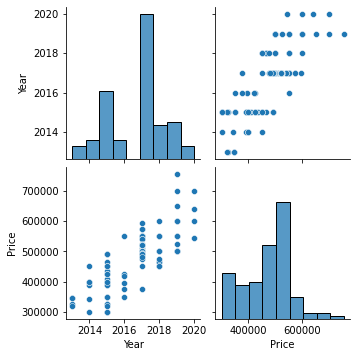

In [7]:
sns.pairplot(data[['Year','Price']])

Text(0.5, 1.0, 'Year')

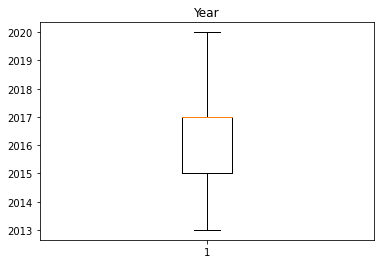

In [8]:
plt.boxplot(data['Year'])
plt.title('Year')

Text(0.5, 1.0, 'Price')

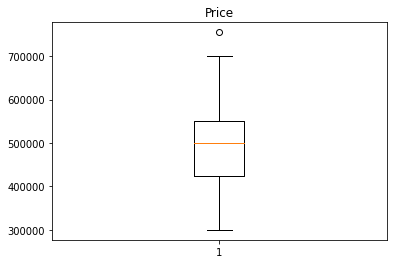

In [9]:
plt.boxplot(data['Price'])
plt.title('Price')

In [10]:
Q1=np.percentile(data['Price'],25, interpolation='midpoint')
Q2=np.percentile(data['Price'],50, interpolation='midpoint')
Q3=np.percentile(data['Price'],75, interpolation='midpoint')
print (Q1)
print (Q2)
print (Q3)

422500.0
500000.0
550000.0


In [11]:
data['Price'].median()

500000.0

Handling outlier- Price data

In [12]:
IQR= Q3-Q1
IQR

127500.0

In [13]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print (low_lim)
print (up_lim)

231250.0
741250.0


In [18]:
outliers=[]
for i in data ['Price']:
  if (i> up_lim) or (i< low_lim):
    outliers.append(i)
outliers    

[755000]

Finding index of outlier 

In [19]:
 ind= data['Price'] > up_lim 
 data.loc[ind].index

Int64Index([1], dtype='int64')

In [50]:
data1=data.drop([1])
data1.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [39]:
corrmatrix=data1.corr()

Correlation

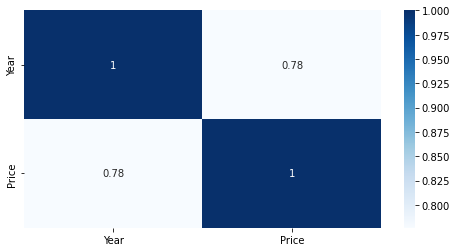

In [40]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, annot=True, cmap='Blues')

Setting y as target and x as feature

In [92]:
y=data1['Price']
x=data1.drop(['Price'],axis=1)

In [86]:
data2=data1.drop_duplicates() # can drop duplicates
data2.shape

(57, 2)

**Finding mean for understanding the best fit line**

In [80]:
print(data1['Price'].mean()) 

481423.3963963964


y=mx+b is the linear equation  relating target y and feature x

In [ ]:
## y=481423x+b is the linear equation

x can be encoded as it contains the year 

In [46]:
x.head()

,Year
0,2018
2,2019
3,2018
4,2018
5,2015


In [87]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

In [90]:
data1['Year']=label_encoder.fit_transform(data1['Year'])
data1.head()

,Year,Price
0,5,465000
2,6,700000
3,5,465000
4,5,465000
5,2,350000


In [94]:
X=data1.drop(['Price'],axis=1)
X.head()

,Year
0,5
2,6
3,5
4,5
5,2


Creating the model using linear regression

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [99]:
model1=lr.fit(X_train,y_train)
predictions=model1.predict(X_test)
predictions

array([418695.08304033, 541198.43288521, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.88283351,
       622867.3327818 , 500363.98293692, 418695.08304033, 377860.63309204,
       541198.43288521, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314374, 459529.53298862, 582032.88283351,
       582032.88283351, 500363.98293692, 500363.98293692])

In [98]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error is ',mean_squared_error(y_test,predictions))
print('R squared value is ',r2_score(y_test,predictions))

Mean squared error is  2360736941.0489926
R squared value is  0.7087665874512095


In [ ]:
## Scaling

In [47]:
from sklearn import preprocessing


In [55]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max_scaler.fit_transform(x)
x=pd.DataFrame(x,columns=['Year'])
x.describe()

,Year
count,111.000000
mean,0.521236
std,0.231674
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [54]:
x.head()

,Year
0,0.714286
1,0.857143
2,0.714286
3,0.714286
4,0.285714


In [101]:
model2=lr.fit(x_train,y_train)
predictions=model2.predict(x_test)
predictions

array([418695.08304033, 541198.43288522, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.8828335 ,
       622867.3327818 , 500363.98293692, 418695.08304033, 377860.63309205,
       541198.43288522, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314374, 459529.53298863, 582032.8828335 ,
       582032.8828335 , 500363.98293692, 500363.98293692])

In [58]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error is ',mean_squared_error(y_test,predictions))
print('R squared value is ',r2_score(y_test,predictions))

Mean squared error is  2360736941.049015
R squared value is  0.7087665874512068


This implies that scaling did not make much diffence in the model

**Lasso Regression**

In [59]:
from sklearn.linear_model import Lasso
# applying lasso regression on the training set with an arbitrarily regularization parameter α of 1
reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

In [102]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2)) #r2 of training and testing data
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set -12807.7
R squared test set -12203.08


In [103]:
# MSE of Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# MSE of Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 956744669160.78
MSE test set 997286797461.46


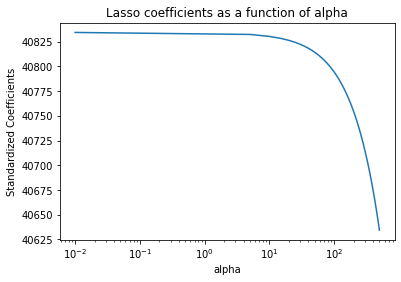

In [105]:
# Plotting lasso coefficients as a function of alpha
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

So with increasing alpha, the coefficient estimates decreases.

In [106]:
from sklearn.linear_model import LassoCV  # Cross Validation

In [107]:
model3 = LassoCV(cv=5, random_state=0, max_iter=10000)

In [108]:
model3.fit(X_train, y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [109]:
model3.alpha_   # best value of penalization chosen by cross validation

2197.1068022963445

In [110]:
lasso_best = Lasso(alpha=model3.alpha_) #setting best alpha
lasso_best.fit(X_train, y_train)

Lasso(alpha=2197.1068022963445)

In [111]:
print(list(zip(lasso_best.coef_, X)))   # model coefficient and name

[(39954.69839312396, 'Year')]


In [112]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 56.16
R squared test set 70.5


In [113]:
mean_squared_error(y_test, lasso_best.predict(X_test))

2390888096.81016

Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.